<a href="https://colab.research.google.com/github/Pratham-04/CS786A-Spring-2020-21/blob/main/Assignments/_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neurodynex3
!pip install mnist

     |████████████████████████████████| 81kB 4.5MB/s 
     |████████████████████████████████| 163kB 9.7MB/s 
     |████████████████████████████████| 1.2MB 20.6MB/s 
     |████████████████████████████████| 5.9MB 39.0MB/s 
  Created wheel for brian2: filename=Brian2-2.4.2-cp36-cp36m-linux_x86_64.whl size=1257545 sha256=1419486da3e5edfa30a6f3b2c2c118bf5fd83a97d474b9beac8293bf5216593b
  Stored in directory: /root/.cache/pip/wheels/5d/4b/cf/ef50e71df5479d67f981cbb17b1d842381019d27ba144d57de
Successfully built brian2
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


## Assignment 1
Pratham Shukla | Roll no. 17816497

Q1. Can you write you own Hopfield network model that works more or less like the one simulated above? (20 points)

Q2. Run the model with different parameters to figure out how the model's capacity to retrieve the correct pattern in response to a cue deteriorates as a function of 
(a) the informativeness of the cue
(b) the number of other patterns stored in the network
(c) the size of the network

Present your answers with plots and/or math. (20 points)

Q3. Can you write a function that converts MNIST digit [data](https://gitlab.com/datapythonista/mnist) to the sort of patterns used in this simulation? (20 points)

Q4. Can you write an MNIST classifier using the Hopfield network?. Can you characterize its performance using F-score, and compare with [classical](https://github.com/ksopyla/svm_mnist_digit_classification) and [deep](https://github.com/hwalsuklee/tensorflow-mnist-cnn) supervised learning methods? Remember that you can always use multiple samples of the same digit even for the Hopfield network classifier. Summarize your sense of the merits and demerits of using a Hopfield network as a classifier (40 points) 


(Please scroll down inside ouput boxes to see the plots)

In [ ]:
import plotly.express as px
from neurodynex3.hopfield_network import plot_tools
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

Answer 1

In [ ]:
def perturb(subj, num_perts, len_grid): # perturbs a particular pattern at 'num_perts' places
    cue = np.zeros((len_grid, len_grid))
    to_pert = random.sample(range(len_grid**2), num_perts)
    to_pert = np.array(to_pert)
    for i in range(len_grid**2):
        if np.in1d(i, to_pert)[0]:
            cue[int(i/len_grid)][int(i%len_grid)] = -1*subj[int(i/len_grid)][int(i%len_grid)]
        else:
            cue[int(i/len_grid)][int(i%len_grid)] = subj[int(i/len_grid)][int(i%len_grid)]
    return cue

def calc_weights(patterns, len_grid, num_patterns): # calculates the weights matrix for a list of patterns
    weights = np.zeros((len_grid, len_grid, len_grid**2))

    for i in range(len_grid):
        for j in range(len_grid):
            for k in range(len_grid):
                for l in range(len_grid):
                    w = 0
                    for m in range(num_patterns):
                        if (i == k) and (j==l):
                            continue
                        else:
                            w = w + patterns[m][i][j]*patterns[m][k][l] # this is the summing operation as written in the analytical expresison
                        #print(i, j, k, l, m)
                    weights[i][j][k*len_grid + l] = w

    return np.divide(weights, (len_grid**2))

def evolve(cue, weights, len_grid): # makes a single timestep evoluation of the 'cue' using 'weights' matrix
    evolved = np.zeros((len_grid, len_grid))
    for i in range(len_grid):
        for j in range(len_grid):
            sum = 0
            for k in range(len_grid):
                for l in range(len_grid):
                    sum = sum + (weights[i][j][k*len_grid + l])*(cue[k][l]) # this is the summing operation as written in the analytical expression
                    
            evolved[i][j] = sum
    
    return np.sign(evolved)

def hopfield(num_patterns, len_grid, num_perts, num_iters, idx_cue): # combined function that generates random patterns, makes a cue and evolves it
                                                                     # 'num_iters' times
    patterns = [] # list for random patterns
    for i in range(0, num_patterns):
        patterns.append(np.sign(np.subtract(np.random.rand(len_grid, len_grid), 0.5)))

    weights = calc_weights(patterns, len_grid, num_patterns) # weights for the patterns 
    cue = perturb(patterns[idx_cue], num_perts, len_grid) # generating cue from one of the patterns

    evolved_list = [cue]
    for i in range(num_iters): # evolving the cue
        cue = evolved_list[i]
        evolved_list.append(evolve(cue, weights, len_grid))

    overlaps = np.zeros(num_patterns)
    for i in range(num_patterns): # calculating the overlap of the finally evolved cue with all other patterns
        overlaps[i] = np.dot(np.ravel(patterns[i]), np.ravel(evolved_list[-1]))/(len_grid**2)

    recover = -1
    if np.argmax(overlaps) == idx_cue: # whether or not the complete overlap occurs for the intended pattern
        recover = 1                    # Note: When talking about neurons, complete overlap and not maximum overlap would be a better criterion
    else:                              # because the state of even a single neuron can point to another meaningful associated concept
        recover = 0

    return patterns, evolved_list, overlaps, recover # returns the random patterns, the list of the evolving cue at each timestep, the overlaps
                                                     # of final form with every pattern, and whether or not the actual pattern was recovered
                                                     # with complete overlap

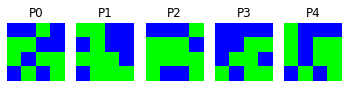

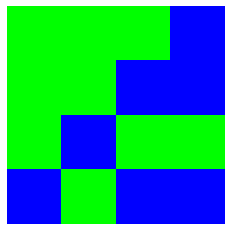

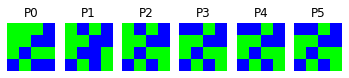

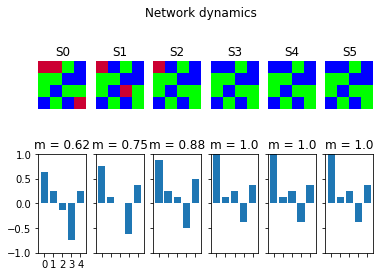

In [ ]:
num_patterns = 5 # number of random patterns to be generated
len_grid = 4  # side length of the square pattern
num_perts = 3 # number of places where one of the pattern will be perturbed to form the cue
num_iters = 5 # Number of iteration of the Hopfiled network 
idx_cue = 0 # Index of the pattern in 'patterns' to be perturbed

patterns, evolved_list, overlap, rec = hopfield(num_patterns, len_grid, num_perts, num_iters, idx_cue) # running the network
plot_tools.plot_pattern_list(patterns) # plotting the pattern list
plot_tools.plot_pattern(evolved_list[0]) # plotting the cue
plot_tools.plot_pattern_list(evolved_list) # plotting the list of cue evolutions
plot_tools.plot_state_sequence_and_overlap(evolved_list, patterns, reference_idx=idx_cue, suptitle="Network dynamics") # plotting cue evolutions with overlap

Answer 2.

Since the model's capacity has to be judged only on the informativeness of the cue, the number of patterns, and the size of each pattern, I fix the number of evolution timesteps to 10.

For all subsequent parts in this question, accuracy is defined as the percentage of number of the times when the pattern with the maximum overlap was also the one thatwas used to generate the cue.
The overlap reported is the overlap between the final evolved state of the cue after 10 iterations and the original pattern using which it was generated.

Out of the three parameters of interest in this question, the analysis has been done as follows - accuracy and overlap have been plotted against the parameter of interest, for cases defined by the other two parameters - one at a time.

a) Informativeness of the cue - this correponds to the number of perturbations of any of the patterns to generate the cue

In [ ]:
import pandas as pd

Streaming output truncated to the last 5000 lines.
1 0 0
1 0 1
1 0 2
1 0 3
1 0 4
1 0 5
1 0 6
1 0 7
1 0 8
1 0 9
1 0 10
1 0 11
1 0 12
1 0 13
1 0 14
1 0 15
1 0 16
1 0 17
1 0 18
1 0 19
1 0 20
1 0 21
1 0 22
1 0 23
1 0 24
1 0 25
1 0 26
1 0 27
1 0 28
1 0 29
1 0 30
1 0 31
1 0 32
1 0 33
1 0 34
1 0 35
1 0 36
1 0 37
1 0 38
1 0 39
1 0 40
1 0 41
1 0 42
1 0 43
1 0 44
1 0 45
1 0 46
1 0 47
1 0 48
1 0 49
1 0 50
1 0 51
1 0 52
1 0 53
1 0 54
1 0 55
1 0 56
1 0 57
1 0 58
1 0 59
1 0 60
1 0 61
1 0 62
1 0 63
1 0 64
1 0 65
1 0 66
1 0 67
1 0 68
1 0 69
1 0 70
1 0 71
1 0 72
1 0 73
1 0 74
1 0 75
1 0 76
1 0 77
1 0 78
1 0 79
1 0 80
1 0 81
1 0 82
1 0 83
1 0 84
1 0 85
1 0 86
1 0 87
1 0 88
1 0 89
1 0 90
1 0 91
1 0 92
1 0 93
1 0 94
1 0 95
1 0 96
1 0 97
1 0 98
1 0 99
1 1 0
1 1 1
1 1 2
1 1 3
1 1 4
1 1 5
1 1 6
1 1 7
1 1 8
1 1 9
1 1 10
1 1 11
1 1 12
1 1 13
1 1 14
1 1 15
1 1 16
1 1 17
1 1 18
1 1 19
1 1 20
1 1 21
1 1 22
1 1 23
1 1 24
1 1 25
1 1 26
1 1 27
1 1 28
1 1 29
1 1 30
1 1 31
1 1 32
1 1 33
1 1 34
1 1 35
1 1 36
1 1 37
1 1

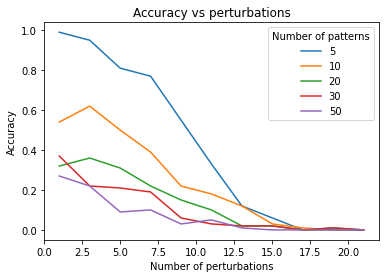

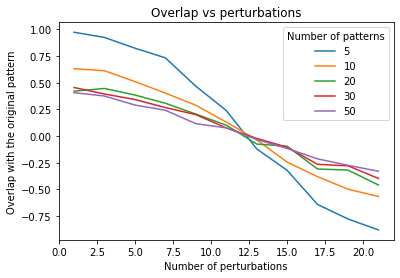

In [ ]:
len_grid = 5
num_iters = 10
param1 = np.linspace(1, 21, 11, dtype = np.int64) # number of perturbations
param2 = np.array([5, 10, 20, 30, 50]) # number of patterns
numSims = 100 # number of simulations for each condition
idx_cue = 0

df_rec = pd.DataFrame(np.zeros((len(param1), len(param2))), columns = param2, index = param1)
df_ovlp = pd.DataFrame(np.zeros((len(param1), len(param2))), columns = param2, index = param1)

for x in range(len(param1)):
    num_perts = param1[x]
    for y in range(len(param2)):
        num_patterns = param2[y]
        arr1 = []
        arr2 = []
        for z in range(numSims):
            print(x, y, z)
            a, b, ovlps, rec = hopfield(int(num_patterns), len_grid, int(num_perts), num_iters, idx_cue)
            arr1.append(ovlps[idx_cue])
            arr2.append(rec)
        arr1 = np.array(arr1)
        arr2 = np.array(arr2)
        
        df_ovlp.loc[num_perts, num_patterns] = np.mean(arr1)
        df_rec.loc[num_perts, num_patterns] = np.mean(arr2)


p1 = df_rec.plot(title = 'Accuracy vs perturbations')
p1.set_xlabel('Number of perturbations')
p1.set_ylabel('Accuracy')
p1.legend(title = 'Number of patterns')

p2 = df_ovlp.plot(title = 'Overlap vs perturbations')
p2.set_xlabel('Number of perturbations')
p2.set_ylabel('Overlap with the original pattern')
p2.legend(title = 'Number of patterns')

# The value on y-axis for each condition for number of patterns and number of perturbations have been averaged over 100 simulations of the process

I conclude that the accuracy and the overlap between the orginal pattern and the final evolved state drops as the informativess of the cue decreases, which is represented by increasing number of perturbations. This is seems natural as the farther the cue is from the pattern, the less information it contains about it, and subsequently overlaps less and lesser number of times with it.
Also, as the number of patterns increase, the overlap and accuracy decrease. This is because with larger patterns, it becomes more likely that one or more patterns are similar. This may make the network converge to patterns other than the original.

0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
0 0 5
0 0 6
0 0 7
0 0 8
0 0 9
0 0 10
0 0 11
0 0 12
0 0 13
0 0 14
0 0 15
0 0 16
0 0 17
0 0 18
0 0 19
0 0 20
0 0 21
0 0 22
0 0 23
0 0 24
0 0 25
0 0 26
0 0 27
0 0 28
0 0 29
0 0 30
0 0 31
0 0 32
0 0 33
0 0 34
0 0 35
0 0 36
0 0 37
0 0 38
0 0 39
0 0 40
0 0 41
0 0 42
0 0 43
0 0 44
0 0 45
0 0 46
0 0 47
0 0 48
0 0 49
0 1 0
0 1 1
0 1 2
0 1 3
0 1 4
0 1 5
0 1 6
0 1 7
0 1 8
0 1 9
0 1 10
0 1 11
0 1 12
0 1 13
0 1 14
0 1 15
0 1 16
0 1 17
0 1 18
0 1 19
0 1 20
0 1 21
0 1 22
0 1 23
0 1 24
0 1 25
0 1 26
0 1 27
0 1 28
0 1 29
0 1 30
0 1 31
0 1 32
0 1 33
0 1 34
0 1 35
0 1 36
0 1 37
0 1 38
0 1 39
0 1 40
0 1 41
0 1 42
0 1 43
0 1 44
0 1 45
0 1 46
0 1 47
0 1 48
0 1 49
0 2 0
0 2 1
0 2 2
0 2 3
0 2 4
0 2 5
0 2 6
0 2 7
0 2 8
0 2 9
0 2 10
0 2 11
0 2 12
0 2 13
0 2 14
0 2 15
0 2 16
0 2 17
0 2 18
0 2 19
0 2 20
0 2 21
0 2 22
0 2 23
0 2 24
0 2 25
0 2 26
0 2 27
0 2 28
0 2 29
0 2 30
0 2 31
0 2 32
0 2 33
0 2 34
0 2 35
0 2 36
0 2 37
0 2 38
0 2 39
0 2 40
0 2 41
0 2 42
0 2 43
0 2 44
0 2 45
0 2 46
0

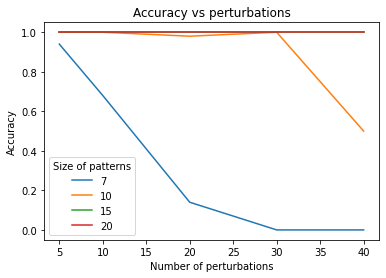

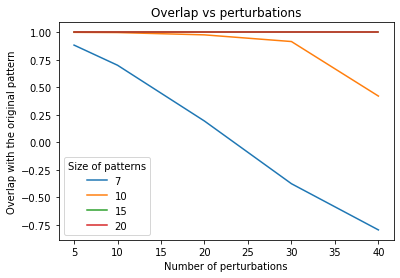

In [ ]:
num_patterns = 10
num_iters = 10
param1 = np.array([5, 10, 20, 30, 40]) # number of perturbations
param2 = np.array([7, 10, 15, 20]) # size of patterns
numSims = 50 # number of simulations for each condition
idx_cue = 0

df_rec = pd.DataFrame(np.zeros((len(param1), len(param2))), columns = param2, index = param1)
df_ovlp = pd.DataFrame(np.zeros((len(param1), len(param2))), columns = param2, index = param1)

for x in range(len(param1)):
    num_perts = param1[x]
    for y in range(len(param2)):
        len_grid = param2[y]
        arr1 = []
        arr2 = []
        for z in range(numSims):
            print(x, y, z)
            a, b, ovlps, rec = hopfield(int(num_patterns), len_grid, int(num_perts), num_iters, idx_cue)
            arr1.append(ovlps[idx_cue])
            arr2.append(rec)
        arr1 = np.array(arr1)
        arr2 = np.array(arr2)
        
        df_ovlp.loc[num_perts, len_grid] = np.mean(arr1)
        df_rec.loc[num_perts, len_grid] = np.mean(arr2)


p1 = df_rec.plot(title = 'Accuracy vs perturbations')
p1.set_xlabel('Number of perturbations')
p1.set_ylabel('Accuracy')
p1.legend(title = 'Size of patterns')

p2 = df_ovlp.plot(title = 'Overlap vs perturbations')
p2.set_xlabel('Number of perturbations')
p2.set_ylabel('Overlap with the original pattern')
p2.legend(title = 'Size of patterns')

# The value on y-axis for each condition for number of patterns and number of perturbations have been averaged over 100 simulations of the process

With increaing number of perturbations, the accuracy and overlap decrease, as explained previously. Taking the size of the patterns into account, as the pattern size increases, the accuracy increases, because for same number of perturbations a larger pattern is relatively less perturbed than smaller ones. Hence, it is more accurate and shows more overlap. In the graph, the larger patters always remain at ceiling accuracy and overlap due to the stated reasons.

b) Number of Patterns

0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
0 0 5
0 0 6
0 0 7
0 0 8
0 0 9
0 0 10
0 0 11
0 0 12
0 0 13
0 0 14
0 0 15
0 0 16
0 0 17
0 0 18
0 0 19
0 0 20
0 0 21
0 0 22
0 0 23
0 0 24
0 0 25
0 0 26
0 0 27
0 0 28
0 0 29
0 0 30
0 0 31
0 0 32
0 0 33
0 0 34
0 0 35
0 0 36
0 0 37
0 0 38
0 0 39
0 0 40
0 0 41
0 0 42
0 0 43
0 0 44
0 0 45
0 0 46
0 0 47
0 0 48
0 0 49
0 0 50
0 0 51
0 0 52
0 0 53
0 0 54
0 0 55
0 0 56
0 0 57
0 0 58
0 0 59
0 0 60
0 0 61
0 0 62
0 0 63
0 0 64
0 0 65
0 0 66
0 0 67
0 0 68
0 0 69
0 0 70
0 0 71
0 0 72
0 0 73
0 0 74
0 0 75
0 0 76
0 0 77
0 0 78
0 0 79
0 0 80
0 0 81
0 0 82
0 0 83
0 0 84
0 0 85
0 0 86
0 0 87
0 0 88
0 0 89
0 0 90
0 0 91
0 0 92
0 0 93
0 0 94
0 0 95
0 0 96
0 0 97
0 0 98
0 0 99
0 1 0
0 1 1
0 1 2
0 1 3
0 1 4
0 1 5
0 1 6
0 1 7
0 1 8
0 1 9
0 1 10
0 1 11
0 1 12
0 1 13
0 1 14
0 1 15
0 1 16
0 1 17
0 1 18
0 1 19
0 1 20
0 1 21
0 1 22
0 1 23
0 1 24
0 1 25
0 1 26
0 1 27
0 1 28
0 1 29
0 1 30
0 1 31
0 1 32
0 1 33
0 1 34
0 1 35
0 1 36
0 1 37
0 1 38
0 1 39
0 1 40
0 1 41
0 1 42
0 1 43
0 1 44
0 1 4

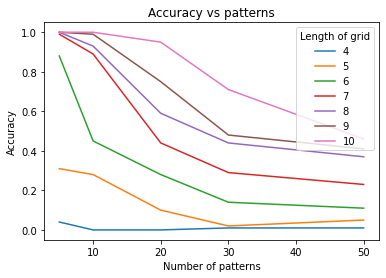

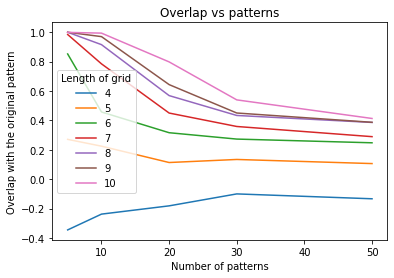

In [ ]:
num_perts = 10
num_iters = 10
param1 = np.array([5, 10, 20, 30, 50]) # number of patterns
param2 = np.array([4, 5, 6, 7, 8, 9, 10]) # length of grid
numSims = 100 # number of simulations for each condition
idx_cue = 0

df_rec = pd.DataFrame(np.zeros((len(param1), len(param2))), columns = param2, index = param1)
df_ovlp = pd.DataFrame(np.zeros((len(param1), len(param2))), columns = param2, index = param1)

for x in range(len(param1)):
    num_patterns = param1[x]
    for y in range(len(param2)):
        len_grid = param2[y]
        arr1 = []
        arr2 = []
        for z in range(numSims):
            print(x, y, z)
            a, b, ovlps, rec = hopfield(int(num_patterns), int(len_grid), int(num_perts), num_iters, idx_cue)
            arr1.append(ovlps[idx_cue])
            arr2.append(rec)
        arr1 = np.array(arr1)
        arr2 = np.array(arr2)
        
        df_ovlp.loc[num_patterns, len_grid] = np.mean(arr1)
        df_rec.loc[num_patterns, len_grid] = np.mean(arr2)


p1 = df_rec.plot(title = 'Accuracy vs patterns')
p1.set_xlabel('Number of patterns')
p1.set_ylabel('Accuracy')
p1.legend(title = 'Length of grid')

p2 = df_ovlp.plot(title = 'Overlap vs patterns')
p2.set_xlabel('Number of patterns')
p2.set_ylabel('Overlap with the original pattern')
p2.legend(title = 'Length of grid')

# The value on y-axis for each condition for number of patterns and number of perturbations have been averaged over 100 simulations of the process

I conclude that accuracy and overlap keep decreasing as the number of patterns increase. This is because for increased number of patterns, the chances of obtaining patterns that are similar to each other increases. This can make the network converge to those patterns as well, hence reducing the overall performace.
Increasing pattern size results in increased accuracy and overlap - this can be explained citing the same reasons. With increase in pattern size, at fixed number of patterns, the chances of any two patterns being similar decreases, and the susequently the cue can coverge back to the original pattern more often, avoiding competition.

0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
0 0 5
0 0 6
0 0 7
0 0 8
0 0 9
0 0 10
0 0 11
0 0 12
0 0 13
0 0 14
0 0 15
0 0 16
0 0 17
0 0 18
0 0 19
0 0 20
0 0 21
0 0 22
0 0 23
0 0 24
0 0 25
0 0 26
0 0 27
0 0 28
0 0 29
0 0 30
0 0 31
0 0 32
0 0 33
0 0 34
0 0 35
0 0 36
0 0 37
0 0 38
0 0 39
0 0 40
0 0 41
0 0 42
0 0 43
0 0 44
0 0 45
0 0 46
0 0 47
0 0 48
0 0 49
0 0 50
0 0 51
0 0 52
0 0 53
0 0 54
0 0 55
0 0 56
0 0 57
0 0 58
0 0 59
0 0 60
0 0 61
0 0 62
0 0 63
0 0 64
0 0 65
0 0 66
0 0 67
0 0 68
0 0 69
0 0 70
0 0 71
0 0 72
0 0 73
0 0 74
0 0 75
0 0 76
0 0 77
0 0 78
0 0 79
0 0 80
0 0 81
0 0 82
0 0 83
0 0 84
0 0 85
0 0 86
0 0 87
0 0 88
0 0 89
0 0 90
0 0 91
0 0 92
0 0 93
0 0 94
0 0 95
0 0 96
0 0 97
0 0 98
0 0 99
0 1 0
0 1 1
0 1 2
0 1 3
0 1 4
0 1 5
0 1 6
0 1 7
0 1 8
0 1 9
0 1 10
0 1 11
0 1 12
0 1 13
0 1 14
0 1 15
0 1 16
0 1 17
0 1 18
0 1 19
0 1 20
0 1 21
0 1 22
0 1 23
0 1 24
0 1 25
0 1 26
0 1 27
0 1 28
0 1 29
0 1 30
0 1 31
0 1 32
0 1 33
0 1 34
0 1 35
0 1 36
0 1 37
0 1 38
0 1 39
0 1 40
0 1 41
0 1 42
0 1 43
0 1 44
0 1 4

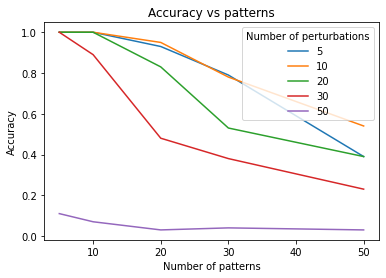

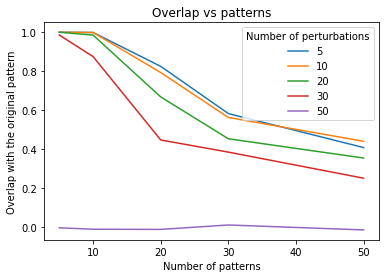

In [ ]:
len_grid = 10
num_iters = 10
param1 = np.array([5, 10, 20, 30, 50]) # number of patterns
param2 = np.array([5, 10, 20, 30, 50]) # number of perturbations
numSims = 100 # number of simulations for each condition
idx_cue = 0

df_rec = pd.DataFrame(np.zeros((len(param1), len(param2))), columns = param2, index = param1)
df_ovlp = pd.DataFrame(np.zeros((len(param1), len(param2))), columns = param2, index = param1)

for x in range(len(param1)):
    num_patterns = param1[x]
    for y in range(len(param2)):
        num_perts = param2[y]
        arr1 = []
        arr2 = []
        for z in range(numSims):
            print(x, y, z)
            a, b, ovlps, rec = hopfield(int(num_patterns), int(len_grid), int(num_perts), num_iters, idx_cue)
            arr1.append(ovlps[idx_cue])
            arr2.append(rec)
        arr1 = np.array(arr1)
        arr2 = np.array(arr2)
        
        df_ovlp.loc[num_patterns, num_perts] = np.mean(arr1)
        df_rec.loc[num_patterns, num_perts] = np.mean(arr2)


p1 = df_rec.plot(title = 'Accuracy vs patterns')
p1.set_xlabel('Number of patterns')
p1.set_ylabel('Accuracy')
p1.legend(title = 'Number of perturbations')

p2 = df_ovlp.plot(title = 'Overlap vs patterns')
p2.set_xlabel('Number of patterns')
p2.set_ylabel('Overlap with the original pattern')
p2.legend(title = 'Number of perturbations')

# The value on y-axis for each condition for number of patterns and number of perturbations have been averaged over 100 simulations of the process

With increasing number of patterns, the accuracy and overlap decrease as discussed already. As the number of perturbations increase, the accuracy naturally drops, because of the cue being farther (less overlapped) with the actual pattern, and hence increasing the chances of converging with others.

c) Size of patterns

0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
0 0 5
0 0 6
0 0 7
0 0 8
0 0 9
0 0 10
0 0 11
0 0 12
0 0 13
0 0 14
0 0 15
0 0 16
0 0 17
0 0 18
0 0 19
0 0 20
0 0 21
0 0 22
0 0 23
0 0 24
0 0 25
0 0 26
0 0 27
0 0 28
0 0 29
0 0 30
0 0 31
0 0 32
0 0 33
0 0 34
0 0 35
0 0 36
0 0 37
0 0 38
0 0 39
0 0 40
0 0 41
0 0 42
0 0 43
0 0 44
0 0 45
0 0 46
0 0 47
0 0 48
0 0 49
0 1 0
0 1 1
0 1 2
0 1 3
0 1 4
0 1 5
0 1 6
0 1 7
0 1 8
0 1 9
0 1 10
0 1 11
0 1 12
0 1 13
0 1 14
0 1 15
0 1 16
0 1 17
0 1 18
0 1 19
0 1 20
0 1 21
0 1 22
0 1 23
0 1 24
0 1 25
0 1 26
0 1 27
0 1 28
0 1 29
0 1 30
0 1 31
0 1 32
0 1 33
0 1 34
0 1 35
0 1 36
0 1 37
0 1 38
0 1 39
0 1 40
0 1 41
0 1 42
0 1 43
0 1 44
0 1 45
0 1 46
0 1 47
0 1 48
0 1 49
0 2 0
0 2 1
0 2 2
0 2 3
0 2 4
0 2 5
0 2 6
0 2 7
0 2 8
0 2 9
0 2 10
0 2 11
0 2 12
0 2 13
0 2 14
0 2 15
0 2 16
0 2 17
0 2 18
0 2 19
0 2 20
0 2 21
0 2 22
0 2 23
0 2 24
0 2 25
0 2 26
0 2 27
0 2 28
0 2 29
0 2 30
0 2 31
0 2 32
0 2 33
0 2 34
0 2 35
0 2 36
0 2 37
0 2 38
0 2 39
0 2 40
0 2 41
0 2 42
0 2 43
0 2 44
0 2 45
0 2 46
0

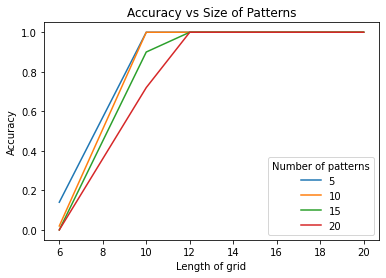

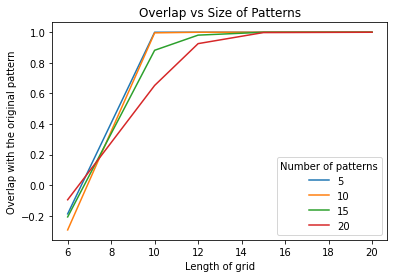

In [ ]:
num_perts = 20
num_iters = 10
param1 = np.array([6, 10, 12, 15, 20]) # size of patterns
param2 = np.array([5, 10, 15, 20]) # number of patterns
numSims = 20 # number of simulations for each condition
idx_cue = 0

df_rec = pd.DataFrame(np.zeros((len(param1), len(param2))), columns = param2, index = param1)
df_ovlp = pd.DataFrame(np.zeros((len(param1), len(param2))), columns = param2, index = param1)

for x in range(len(param1)):
    len_grid = param1[x]
    for y in range(len(param2)):
        num_patterns = param2[y]
        arr1 = []
        arr2 = []
        for z in range(numSims):
            print(x, y, z)
            a, b, ovlps, rec = hopfield(int(num_patterns), int(len_grid), int(num_perts), num_iters, idx_cue)
            arr1.append(ovlps[idx_cue])
            arr2.append(rec)
        arr1 = np.array(arr1)
        arr2 = np.array(arr2)
        
        df_ovlp.loc[len_grid, num_patterns] = np.mean(arr1)
        df_rec.loc[len_grid, num_patterns] = np.mean(arr2)


p1 = df_rec.plot(title = 'Accuracy vs Size of Patterns')
p1.set_xlabel('Length of grid')
p1.set_ylabel('Accuracy')
p1.legend(title = 'Number of patterns')

p2 = df_ovlp.plot(title = 'Overlap vs Size of Patterns')
p2.set_xlabel('Length of grid')
p2.set_ylabel('Overlap with the original pattern')
p2.legend(title = 'Number of patterns')

# The value on y-axis for each condition for number of patterns and number of perturbations have been averaged over 20 simulations of the process

As the size of the pattern increases, the accuracy and overlap increase too. This, again, is because the the similarity between different patterns decreases as the size increases, which provides the network less competition, and makes it converge to the original pattern more often. 
With increasing number of patterns, again, the similarity between the increases and hence the accuracy and overlap, at a particular grid-length decrease.

0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
0 0 5
0 0 6
0 0 7
0 0 8
0 0 9
0 0 10
0 0 11
0 0 12
0 0 13
0 0 14
0 0 15
0 0 16
0 0 17
0 0 18
0 0 19
0 0 20
0 0 21
0 0 22
0 0 23
0 0 24
0 0 25
0 0 26
0 0 27
0 0 28
0 0 29
0 0 30
0 0 31
0 0 32
0 0 33
0 0 34
0 0 35
0 0 36
0 0 37
0 0 38
0 0 39
0 0 40
0 0 41
0 0 42
0 0 43
0 0 44
0 0 45
0 0 46
0 0 47
0 0 48
0 0 49
0 1 0
0 1 1
0 1 2
0 1 3
0 1 4
0 1 5
0 1 6
0 1 7
0 1 8
0 1 9
0 1 10
0 1 11
0 1 12
0 1 13
0 1 14
0 1 15
0 1 16
0 1 17
0 1 18
0 1 19
0 1 20
0 1 21
0 1 22
0 1 23
0 1 24
0 1 25
0 1 26
0 1 27
0 1 28
0 1 29
0 1 30
0 1 31
0 1 32
0 1 33
0 1 34
0 1 35
0 1 36
0 1 37
0 1 38
0 1 39
0 1 40
0 1 41
0 1 42
0 1 43
0 1 44
0 1 45
0 1 46
0 1 47
0 1 48
0 1 49
0 2 0
0 2 1
0 2 2
0 2 3
0 2 4
0 2 5
0 2 6
0 2 7
0 2 8
0 2 9
0 2 10
0 2 11
0 2 12
0 2 13
0 2 14
0 2 15
0 2 16
0 2 17
0 2 18
0 2 19
0 2 20
0 2 21
0 2 22
0 2 23
0 2 24
0 2 25
0 2 26
0 2 27
0 2 28
0 2 29
0 2 30
0 2 31
0 2 32
0 2 33
0 2 34
0 2 35
0 2 36
0 2 37
0 2 38
0 2 39
0 2 40
0 2 41
0 2 42
0 2 43
0 2 44
0 2 45
0 2 46
0

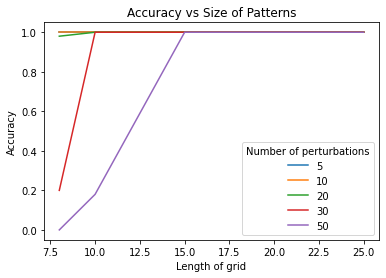

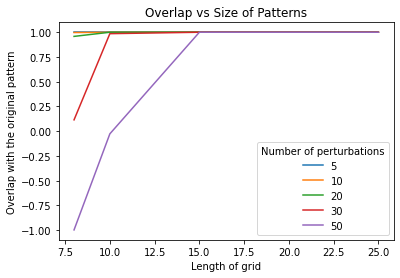

In [ ]:
num_patterns = 5
num_iters = 10
param1 = np.array([8, 10, 15, 20, 25]) # size of patterns
param2 = np.array([5, 10, 20, 30, 50]) # number of perturbations
numSims = 20 # number of simulations for each condition
idx_cue = 0

df_rec = pd.DataFrame(np.zeros((len(param1), len(param2))), columns = param2, index = param1)
df_ovlp = pd.DataFrame(np.zeros((len(param1), len(param2))), columns = param2, index = param1)

for x in range(len(param1)):
    len_grid = param1[x]
    for y in range(len(param2)):
        num_perts = param2[y]
        arr1 = []
        arr2 = []
        for z in range(numSims):
            print(x, y, z)
            a, b, ovlps, rec = hopfield(int(num_patterns), int(len_grid), int(num_perts), num_iters, idx_cue)
            arr1.append(ovlps[idx_cue])
            arr2.append(rec)
        arr1 = np.array(arr1)
        arr2 = np.array(arr2)
        
        df_ovlp.loc[len_grid, num_perts] = np.mean(arr1)
        df_rec.loc[len_grid, num_perts] = np.mean(arr2)


p1 = df_rec.plot(title = 'Accuracy vs Size of Patterns')
p1.set_xlabel('Length of grid')
p1.set_ylabel('Accuracy')
p1.legend(title = 'Number of perturbations')

p2 = df_ovlp.plot(title = 'Overlap vs Size of Patterns')
p2.set_xlabel('Length of grid')
p2.set_ylabel('Overlap with the original pattern')
p2.legend(title = 'Number of perturbations')

# The value on y-axis for each condition for number of patterns and number of perturbations have been averaged over 20 simulations of the process

Reiterating here as well, the accuracy and overlap increase with increasing pattern size, because of lesser similarity between the individual patterns.
And, increasing number of perturbations naturally reduce the accuracy and overlap at fixed values of other parameters.

From answer 2, I see that there are two important factors that determine the model performace. The similarity between the cue and the pattern it is generated from, dictated by number of perturbations. The other is the similarity between individual patterns, which can also be defined by the overlap between them. Increasing the number of patterns increases the similarity between them, because they occupy more and more of the total number of possible patterns that can be generated with a fixed size. And, increasing the size of the pattern decreases the similarity between any two of them because of more number of neurons that can differ in their states.

The subsequent parts will be done on the lines of the modeling done by Belyev and Velichko (2020).
Reference: M A Belyaev and A A Velichko. Classification of handwritten digits using the Hopfield network. 2020. IOP Conf. Ser.: Mater. Sci. Eng. 862 052048

Answer 3
For conversion of the MNIST digits to patterns like ours, the authors deskew the images and crop the 28X28 structure to 14X14. This does not affect the Hamming distance between the digits because most of the outer boundary is black with grayscale value of zero. Further, when cropped to 14X14, the paper mentions that the optimal threshold to preserve the similarity between the digits, is 86. Hence, similar thresholding will be done here.

In [ ]:
import mnist
from scipy.ndimage import interpolation

The code to deskew images has been 'copied' from https://fsix.github.io/mnist/Deskewing.html

In [ ]:
def img2pattern(pat, threshold):
    pat = deskew(pat) # deskew the image (taken from https://fsix.github.io/mnist/Deskewing.html)
    img_pat = np.zeros((14, 14)) # cropping the image to inner 14X14 (removes redundancy)
    for i in range(14):
        for j in range(14):
            img_pat[i][j] = np.sign(pat[i+7][j+7] - threshold)
    
    return img_pat

def moments(image): 
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] 
    totalImage = np.sum(image) #sum of pixels
    m0 = np.sum(c0*image)/totalImage #mu_x
    m1 = np.sum(c1*image)/totalImage #mu_y
    m00 = np.sum((c0-m0)**2*image)/totalImage #var(x)
    m11 = np.sum((c1-m1)**2*image)/totalImage #var(y)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage #covariance(x,y)
    mu_vector = np.array([m0,m1]) 
    covariance_matrix = np.array([[m00,m01],[m01,m11]])
    return mu_vector, covariance_matrix

def deskew(image):
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    return interpolation.affine_transform(image,affine,offset=offset)

train_images = mnist.train_images() # datasets from MNIST
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

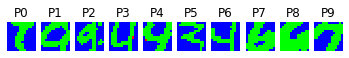

[7, 9, 9, 4, 4, 3, 4, 6, 6, 7]


In [ ]:
threshold = 86 # thresholding as per the paper Belyaev and Velichko, 2020
samp = np.random.choice(len(train_labels), 10) # Choosing any 10 random images from the training set for demonstration
example = []
example_labs = []
for i in range(10):
    x = samp[i]
    example.append(img2pattern(train_images[x], threshold))
    example_labs.append(train_labels[x])

plot_tools.plot_pattern_list(example) # plotting the images
print(example_labs)                   # along with the labels

Answer 4

Note: The question asks to report the F1 score. In our case of multi-class classification, the micro F1 score is same as the accuracy.


In [ ]:
def apply_hopfield(patterns, len_grid, num_iters, cue, avg_refs): # applied the Hopfiled Network model to a cue and compares its overlap with final references
  
    weights = calc_weights(patterns, len_grid, len(patterns))

    temp = deepcopy(cue)
    evolved_list = [cue]
    #ovlaps = all_ovlp(patterns, evolved_list[-1], len_grid)
    for i in range(num_iters):
        cue = evolved_list[-1]
        evolved_list.append(evolve(cue, weights, len_grid))
    
    #plot_tools.plot_pattern_list(evolved_list)
    ovlps = np.zeros(len(avg_refs))
    for i in range(len(avg_refs)):
        ovlps[i] = np.dot(np.ravel(evolved_list[-1]), np.ravel(avg_refs[i]))/(len_grid**2)
        if ovlps[i] == 1:
            return i

    return -1

def check_scores(preds): # checks accuracy scores of the model, both total and numberwise
    acc = (preds[:,0] == preds[:,1]).mean()
    p1 = preds[:,0]
    p2 = preds[:,1]
    accs = []
    for i in range(10):
        x = (p1 == i)
        accs.append((p2[x]==i).mean())

    return acc, accs

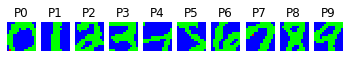

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
(0.12, [0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.6666666666666666, 0.0, 0.0, 0.0])


In [ ]:
len_grid = 14 # length of the grid
num_iters = 10 # fixed number of iterations for the network evolution
threshold = 86  # as taken from the paper
num_each = 1 # number of each digit in the training set
test_set = 100 # number of images in the testing set

patterns_labels = [] # list that stores the labels of the testing set
x = train_labels[0:500]
for i in range(num_each):
    for j in range(10):
        y = np.where(x == j)
        #print(y)
        patterns_labels.append(y[0][0:num_each])

patterns_images = [] # list that stores the images in the testing set
for i in range(10):
    for j in range(num_each):
        patterns_images.append(train_images[patterns_labels[i][j]])

avg_refs = [] # averaged digits from the training set. For example, all zeros in the training set were averaged to for a zero
              # which is stored here. It will be used to calculate overlap while classifying
for i in range(10):
    arr = []
    for j in range(num_each):
        arr.append(patterns_images[num_each*i + j])
    avg_refs.append(np.mean(arr, 0))

patterns_images = np.array(patterns_images)
avg_refs = np.array(avg_refs)

patterns_images_final = []
avg_refs_final = []

for i in range(len(patterns_images)):
    patterns_images_final.append(img2pattern(patterns_images[i], threshold)) # converting training images to required patterns

for i in range(len(avg_refs)):
    avg_refs_final.append(img2pattern(avg_refs[i], threshold)) # converting classification images to required patterns

patterns_images_final = np.array(patterns_images_final)
avg_refs_final = np.array(avg_refs_final)

inds = np.random.choice(len(test_images), test_set, replace = False) # indices of the testing set in the test_images
to_test = [] # images in the training set
to_test_labels = [] # labels of the images in the training set

for i in np.nditer(inds):
    to_test.append(test_images[i])
    to_test_labels.append(test_labels[i])

plot_tools.plot_pattern_list(patterns_images_final)

preds = np.zeros((len(to_test),2))
for i in range(len(to_test)):
    print(i)
    pred = apply_hopfield(patterns_images_final, len_grid, num_iters, img2pattern(to_test[i], threshold), avg_refs_final) 
    preds[i] = [to_test_labels[i], pred] # array with testing set labels and the corresponding prediction

print(check_scores(preds))

In [ ]:
print('Digit\tAccuracy')
acc, accs = check_scores(preds)
for i in range(10):
    print(str(i) + '\t' + str(accs[i]))
print('Total\t' + str(acc))

Digit	Accuracy
0	0.8666666666666667
1	1.0
2	0.1
3	0.0
4	0.0
5	0.1
6	0.16666666666666666
7	0.3333333333333333
8	0.25
9	0.7
Total	0.41


The total model accuracy is 41% when trained on 150 images, and tested on 100 images. As from the array above, many images converge to 0 and 1, giving them very high acuracies. The digits it ends up convergin to changes very erratically with the amount of training data, making it an unreliable clasifier.

The accuracy of the classical supervised learning method is 98.5%, and the accuracy of the deep supervised learning method is 99.72%.

Merits of HNM
1.   It is very simplistic, and doesn't require a lot of training
2.   It works on very small amount of data

Demerits of HNM
1.   It has poor accuracy, when compared to other methods.
2.   It is extremely sensitive to the innacuracies in the input data, and the preprocessing performed on the input data.
3.   It ends up converging to only a few of the training images if the similarity between them is high. Moreover, these digits change with the size of the training data. The model predictions are not very consistent.




